The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,Initial Gen #,Compound,Algorithm,Run #,Runner,Started,Ended,Duration,Lowest eV,Avg # Moves,Moves Array,Avg # Generations,Generations Array,Gen Seq Array
0,Initial Generation: 100,Y2O3,RLCSP,1,Madison,12/12/2024 20:36,12/12/2024 21:36,1 Hour,1.25E+18,41.70769,"[13, 19, 4, 33, 3, 2, 174, 1, 3, 28, 74, 3, 55...",3.42655,"[9, 3, 4, 4, 7, 5, 3, 1, 5, 11, 4, 6, 1, 2, 2,...","[1.4285714285714286e+18, 1.25e+18, 1e+19, 1.25..."
1,Initial Generation: 100,Y2O3,RLCSP,2,Madison,12/12/2024 21:37,12/12/2024 22:37,55 min: able to complete,1.25E+18,50.99355,"[66, 94, 19, 6, 7, 176, 65, 33, 1, 30, 4, 4, 1...",4.12055,"[1, 2, 6, 2, 4, 1, 9, 2, 10, 4, 8, 10, 7, 2, 2...","[2e+19, 1.25e+18, 2e+19, 1.3333333333333332e+1..."
2,Initial Generation: 100,Y2O3,RLCSP AVG,(1+2)/2,-----------,NaN,NaN,1 Hour,1.25E+18,46.35062,-----------,3.77355,-----------,[do not average just show both graphs]
3,Initial Generation: 100,Y2O3,PPO + B1,1,Madison,11/12/2024 11:27,11/12/2024 12:27,1 Hour,1.25E+18,38.04598,"[12, 7, 6, 8, 5, 5, 207, 3, 20, 36, 9, 1, 2, 1...",4.14,"[6, 7, 12, 1, 2, 3, 2, 2, 9, 3, 1, 1, 2, 3, 2,...","[1.53846e+18, 1.00000e+19, 1.53846e+18, 5e+18,..."
4,Initial Generation: 100,Y2O3,PPO + B1,2,Madison,11/12/2024 12:50,11/12/2024 13:50,1 Hour,1.25E+18,39.18824,"[112, 197, 5, 5, 130, 2, 40, 33, 52, 11, 1, 10...",3.375,"[1, 2, 2, 2, 4, 2, 2, 2, 1, 6, 5, 5, 2, 6, 7, ...","[1.25e+18, 2e+19, 1.25e+18, 2e+19, 1.25e+18, 2..."
5,Initial Generation: 100,Y2O3,PPO + B1 AVG,(1+2)/2,-----------,-----------,-----------,1 Hour,1.25E+18,38.61711,-----------,3.7575,-----------,[do not average just show both graphs]
6,Initial Generation: 100,Y2O3,PPO + B2,1,Pedro,12/12/2024 16:54,12/12/2024 17:54,1 Hour,1.25E+18,41.75,"[1, 151, 1, 1, 99, 1, 1, 5, 19, 10, 59, 153]",17,[17],"[1.25e+18, 4e+18]"
7,Initial Generation: 100,Y2O3,PPO + B2,2,Pedro,12/12/2024 17:58,12/12/2024 18:58,1 Hour,1.25E+18,41.52631579,"[65, 159, 4, 1, 1, 45, 8, 70, 22, 1, 16, 58, 2...",5.666666667,"[8, 6, 3]","[1.25e+18, 2e+19, 1.25e+18, 2e+19, 1.25e+18, 1..."
8,Initial Generation: 100,Y2O3,PPO + B2 AVG,(1+2)/2,-----------,-----------,-----------,1 Hour,1.25E+18,41.63815789,-----------,11.33333333,-----------,[do not average just show both graphs]
9,Initial Generation: 100,Y2O3,PPO + (B1+B2)/2,1,Pedro,12/13/2024 1:48,12/13/2024 2:48,1 Hour,1.25E+18,1,"[1, 1]",[],[],[1.25e+18]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


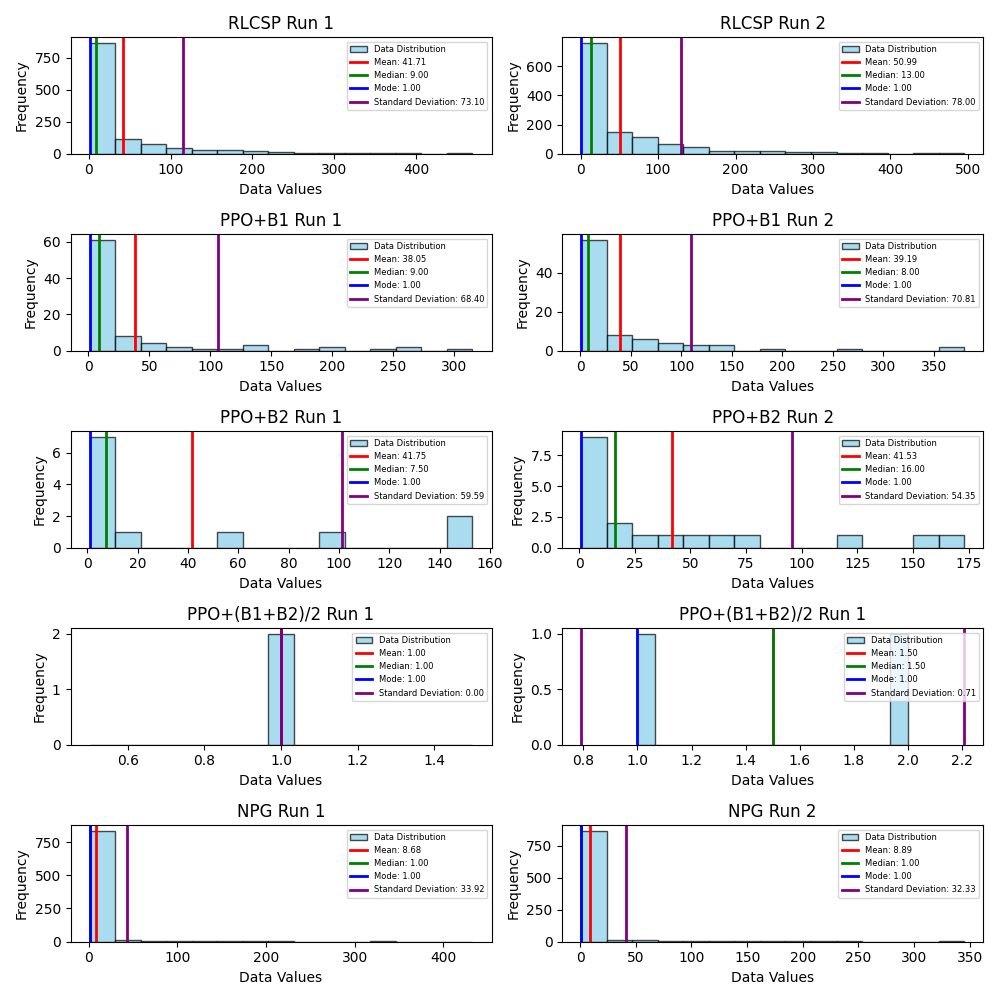

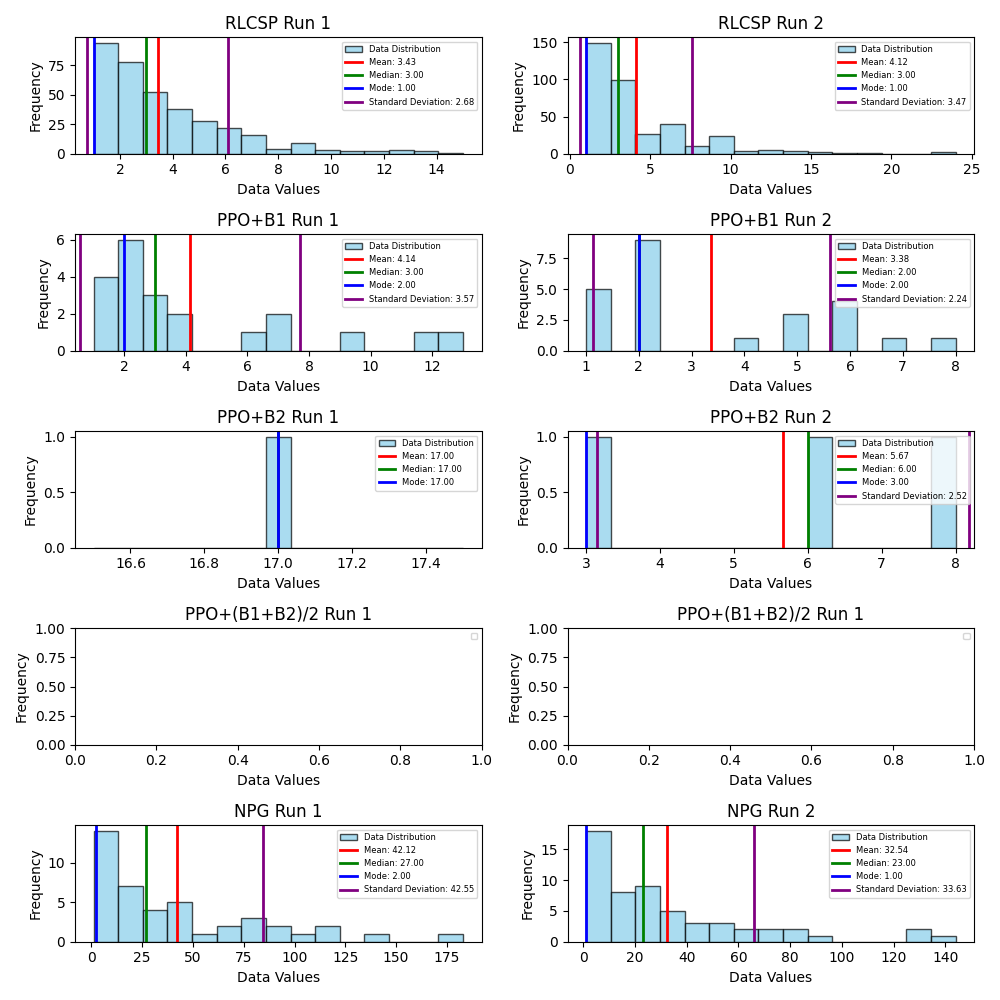

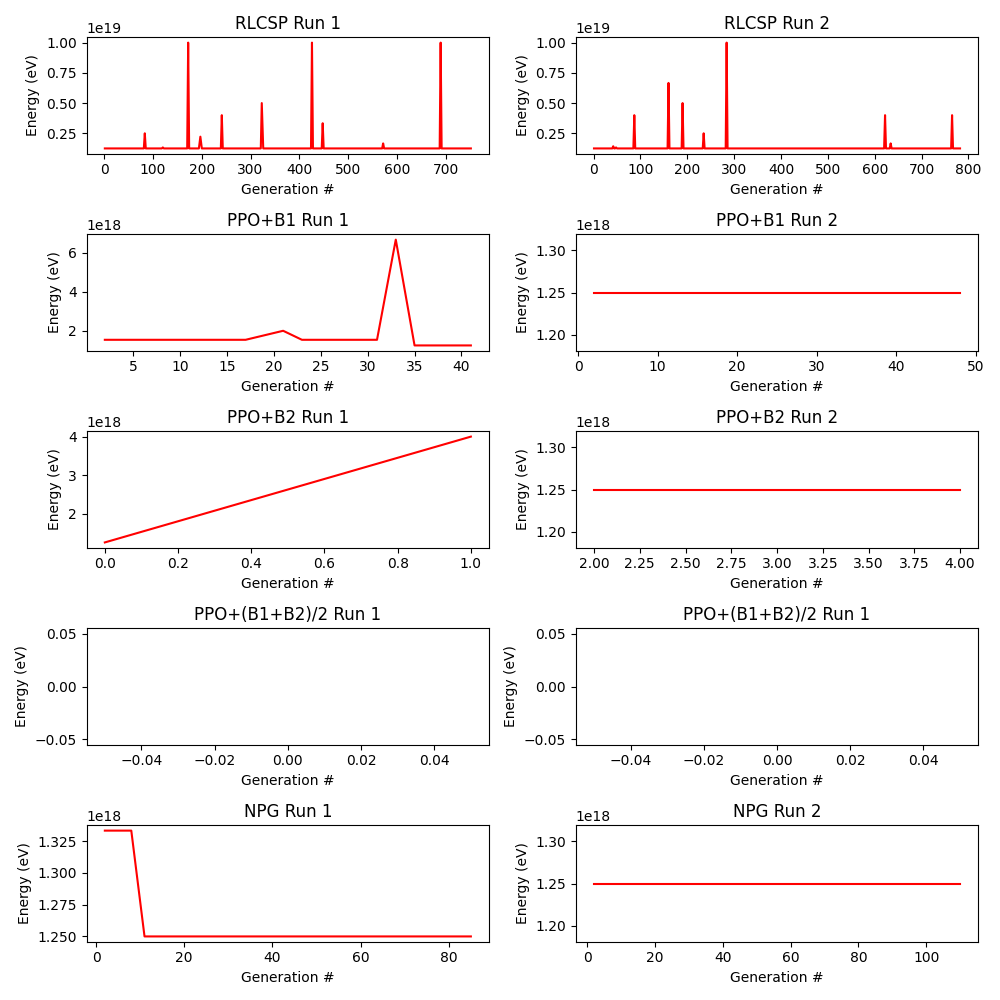

In [41]:
import numpy as np
import statistics as st
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import json
from scipy.signal import argrelmin

%matplotlib widget
%load_ext autoreload
%autoreload 2

file = pd.read_csv("C:/Users/patri/Downloads/CS1840_ Codebase Overview - Results.csv") # change this path
file = file.set_axis(['Initial Gen #','Compound','Algorithm','Run #','Runner','Started','Ended','Duration','Lowest eV','Avg # Moves','Moves Array',
                              'Avg # Generations','Generations Array','Gen Seq Array'], axis=1)
file = file.iloc[1:]
file = file.reset_index(drop=True)

display(file)

experiment_names = ['RLCSP Run 1', 'RLCSP Run 2', 'PPO+B1 Run 1', 'PPO+B1 Run 2', 'PPO+B2 Run 1', 'PPO+B2 Run 2',
                    'PPO+(B1+B2)/2 Run 1', 'PPO+(B1+B2)/2 Run 1', 'NPG Run 1', 'NPG Run 2']
experiment_rows = [0,1,3,4,6,7,9,10,12,13] # change to this vector after adding final data points
# experiment_rows = [0,1,3,4,6,7,12,13] # comment out after adding final data points

def calc_stats(data_array, experiment_names):
        counter = 0
        fig, ax = plt.subplots(5,2,figsize=(10, 10))
    
        rows = 5
        cols = 2
        for j in range(rows):
                for i in range(cols):
                        data = data_array[counter]
                        data = json.loads(data)
                        if len(data) > 0:
                            meanVal = st.mean(data)
                            medianVal = st.median(data)
                            modeVal = stats.mode(data).mode
                            if len(data) > 1:
                                    stdVal = st.stdev(data)

                            ax[j,i].hist(data, bins = 15, color = 'skyblue', alpha = 0.7, 
                                    edgecolor = 'black', label = 'Data Distribution')
                            ax[j,i].axvline(meanVal, color = 'red', linewidth = 2, 
                                    label = f'Mean: {meanVal:.2f}')
                            ax[j,i].axvline(medianVal, color = 'green', linewidth = 2, 
                                    label = f'Median: {medianVal:.2f}')
                            ax[j,i].axvline(modeVal, color = 'blue', linewidth = 2, 
                                    label = f'Mode: {modeVal:.2f}')

                            if len(data) > 1:
                                    if (meanVal - stdVal) >= 0:
                                            ax[j,i].axvline(meanVal - stdVal, color = 'purple', linewidth = 2)
                                    ax[j,i].axvline(meanVal + stdVal, color = 'purple', linewidth = 2, 
                                                    label = f'Standard Deviation: {stdVal:.2f}')


                        ax[j,i].set_title(experiment_names[counter])
                        ax[j,i].set_xlabel("Data Values")
                        ax[j,i].set_ylabel("Frequency")
                        ax[j,i].legend()
                        ax[j,i].legend(fontsize=6) # using a size in points
                        counter+= 1
        fig.tight_layout()

def plot_generations(data_array, experiment_names):
        counter = 0
        fig, ax = plt.subplots(5,2,figsize=(10, 10))
    
        rows = 5
        cols = 2
        for j in range(rows):
                for i in range(cols):
                        data = data_array[counter]
                        data = json.loads(data)
                        if len(data) > 0:
                            convert_data = np.array(data)
                            min_idx = argrelmin(convert_data)
                        #     ax[j,i].plot(np.arange(len(data)),convert_data)
                            ax[j,i].plot(min_idx[0],convert_data[min_idx[0]],color='red')
                            if len(convert_data) == 2:
                                   ax[j,i].plot(np.arange(len(convert_data)),convert_data,color='red')

                        ax[j,i].set_title(experiment_names[counter])
                        ax[j,i].set_xlabel("Generation #")
                        ax[j,i].set_ylabel("Energy (eV)")
                        counter+= 1
        fig.tight_layout()

moves_array = file['Moves Array'][experiment_rows].reset_index(drop=True)
generations_array = file['Generations Array'][experiment_rows].reset_index(drop=True)
gen_seq_array = file['Gen Seq Array'][experiment_rows].reset_index(drop=True)

calc_stats(moves_array, experiment_names)
calc_stats(generations_array, experiment_names)
plot_generations(gen_seq_array, experiment_names)


In [24]:
data_array = gen_seq_array
data = data_array[0]
data = json.loads(data)
data = np.array(data)
print(data)
min_idx = argrelmin(np.array(data))
data[min_idx]

[1.42857143e+18 1.25000000e+18 1.00000000e+19 1.25000000e+18
 2.00000000e+19 1.25000000e+18 1.00000000e+19 1.25000000e+18
 2.00000000e+19 1.25000000e+18 4.00000000e+18 1.25000000e+18
 2.00000000e+19 1.25000000e+18 3.33333333e+18 1.25000000e+18
 2.00000000e+19 1.25000000e+18 2.00000000e+19 1.25000000e+18
 2.00000000e+19 1.25000000e+18 2.00000000e+19 1.25000000e+18
 2.00000000e+19 1.25000000e+18 2.00000000e+19 1.25000000e+18
 1.81818182e+18 1.25000000e+18 1.00000000e+19 1.25000000e+18
 2.00000000e+19 1.25000000e+18 2.00000000e+19 1.25000000e+18
 2.85714286e+18 1.25000000e+18 2.00000000e+19 1.25000000e+18
 2.00000000e+19 1.25000000e+18 1.00000000e+19 2.00000000e+19
 4.00000000e+18 1.25000000e+18 1.00000000e+19 1.25000000e+18
 2.22222222e+18 2.00000000e+19 1.25000000e+18 2.00000000e+19
 1.25000000e+18 2.00000000e+19 1.25000000e+18 3.33333333e+18
 1.25000000e+18 2.00000000e+19 1.25000000e+18 2.00000000e+19
 1.25000000e+18 1.00000000e+19 1.25000000e+18 3.33333333e+18
 1.25000000e+18 1.666666

array([1.25000000e+18, 1.25000000e+18, 1.25000000e+18, 1.25000000e+18,
       1.25000000e+18, 1.25000000e+18, 1.25000000e+18, 1.25000000e+18,
       1.25000000e+18, 1.25000000e+18, 1.25000000e+18, 1.25000000e+18,
       1.25000000e+18, 1.25000000e+18, 1.25000000e+18, 1.25000000e+18,
       1.25000000e+18, 1.25000000e+18, 1.25000000e+18, 1.25000000e+18,
       1.25000000e+18, 1.25000000e+18, 1.25000000e+18, 1.25000000e+18,
       1.25000000e+18, 1.25000000e+18, 1.25000000e+18, 1.25000000e+18,
       1.25000000e+18, 1.25000000e+18, 1.25000000e+18, 1.25000000e+18,
       1.25000000e+18, 1.25000000e+18, 1.25000000e+18, 1.25000000e+18,
       1.25000000e+18, 1.25000000e+18, 1.25000000e+18, 2.50000000e+18,
       1.25000000e+18, 1.25000000e+18, 1.25000000e+18, 1.25000000e+18,
       1.25000000e+18, 1.25000000e+18, 1.25000000e+18, 1.25000000e+18,
       1.25000000e+18, 1.25000000e+18, 1.25000000e+18, 1.25000000e+18,
       1.25000000e+18, 1.25000000e+18, 1.25000000e+18, 1.25000000e+18,
      

In [29]:
len(min_idx[0])

352